In [1]:
import csv
import re
import matplotlib
import seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
import scipy.stats as ss
from matplotlib import style
from matplotlib.lines import Line2D
# import lxml
import html5lib
# import beautifulsoup4 as bs4
from matplotlib import gridspec
# from matplotlib_venn import venn2, venn3, venn3_circles
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata, leaves_list, cophenet
from scipy.spatial.distance import pdist
#pretty display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

matplotlib.style.use('ggplot')
%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (15, 9)
matplotlib.rcParams['figure.figsize'] = (7, 5)

%config InlineBackend.figure_format = 'retina'
# figure out number of indels

# constants

# 1. expression matrix

# use total of immune related gene expression as a measure of immune strength

In [2]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/expression_matrix.dedup.txt'
df = pd.read_csv(f)
df.head(2)
df.shape

,lib,SCYL3,C1orf112,FGR,CFH,STPG1,NIPAL3,AK2,KDM1A,TTC22,...,EIF4A1P2,MXRA5P1,CTBP2P1,ATP5JP1,PARP4P1,KALP,AC006157.2,RP11-886I11.1,RP11-886I11.3,RP11-886I11.2
0,A37700,3.6416,4.8082,0.7059,14.3879,1.6436,8.7098,29.0268,43.5168,18.7297,...,0.0,0.0799,0.0369,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
1,A37701,5.9656,3.9581,2.1283,22.7599,1.2715,6.1969,18.3112,21.3308,30.3388,...,0.0,0.0000,0.0000,0.0,0.0081,0.0,0.0,0.0,0.0,0.0


(82, 42585)

In [10]:
df.set_index('lib', inplace=True)

In [23]:
f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/new_immuno_related_genes.txt'
df2 = pd.read_csv(f2)
df2.head()

,name
0,A2M
1,A2ML1
2,ABCB1
3,ABCF1
4,ACE


In [24]:
genes = df2.name.tolist()

BFCARD15CIAS1DEFA1DEFB103ADEFB106ADGCRELA2IGAD1NBS1NPTM4SF2TNFRSF6TNFSF5 /n


In [26]:
adf = df[genes]

In [27]:
adf['total'] = adf.sum(axis=1)
adf.head()

/home/szong/anaconda3/envs/szvenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,A2M,A2ML1,ABCB1,ABCF1,ACE,ADA,ADAM10,ADAM17,ADAM8,AGFG1,...,WFDC12,WIPF1,XCL1,XCL2,XCR1,XRCC5,YWHAZ,ZAP70,ZEB1,total
lib,,,,,,,,,,,,,,,,,,,,,
A37700,8.6725,49.8247,0.1276,23.8008,1.2163,11.3300,15.1695,16.6601,5.2854,14.5913,...,0.4430,3.8329,0.7380,1.3706,0.1072,40.0692,120.6577,0.6109,0.7988,29074.8650
A37701,16.5862,0.9635,0.8901,25.7403,1.4951,26.3768,11.7987,11.5549,1.5557,32.7519,...,0.0244,5.0753,0.4236,3.6699,0.1032,76.5776,96.8498,2.3178,1.8829,29355.3910
A37702,38.3887,14.7963,0.5093,16.1938,2.1858,5.6640,17.4399,11.3625,4.8982,20.4260,...,0.0594,16.0009,0.3517,0.9783,0.1520,46.5513,81.2132,1.6121,1.5806,18929.3203
A37704,24.5857,16.0323,0.2767,28.8840,2.0064,2.0076,18.9234,17.1404,5.6018,16.6738,...,0.0000,4.7760,2.1878,1.3573,0.2123,79.0898,124.1048,1.0384,3.2785,20817.7079
A37705,59.2830,0.0052,0.5609,28.7933,3.9979,5.6775,20.3943,19.5616,6.1878,14.2803,...,0.0123,9.4565,0.4292,1.6589,0.1284,86.4785,56.1368,3.4143,4.0270,38451.8978


In [35]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_analysis_master_tables_20171010.xls'
bdf = pd.read_excel(f, sheetname='meta_106', index_col='patient')
bdf.head(2)
bdf.shape

,DNA_lib,source,RNA_lib,strelka_snv_indel_total,log10_strelka_total,DNA_microbe_RPM,DNA_microbe_logRPM,combo,RNA_microbe_RPM,RNA_microbe_logRPM,...,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,total_immune_cells,high_hiv_load,low_cd4_counts
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,A37234,HTMCP_124,A37700,26974,4.430945,3.322137,0.521418,Squamous_+,4056.790826,3.608183,...,0.1,519.9,1.9,4.5,4.2,2.6,26.2,535.3,low,>200
HTMCP-03-06-02002,A37235,HTMCP_125,A37701,16661,4.221701,0.058688,-1.231448,Squamous_-,135.435651,2.131733,...,0.5,336.6,6.8,2.4,8.1,1.4,7.5,363.7,low,>200


(106, 62)

In [37]:
bdf = bdf.reset_index()[['RNA_lib', 'patient', 'reanne_HIV_status', 'low_cd4_counts']]

In [41]:
df1 = pd.merge(adf['total'].to_frame(), bdf, left_index=True, right_on='RNA_lib')

In [44]:
df.shape

(81, 5)

In [54]:
df1['log'] = np.log10(df1['total'])

In [58]:
df1

,total,RNA_lib,patient,reanne_HIV_status,low_cd4_counts,log
0,29074.8650,A37700,HTMCP-03-06-02001,Positive,>200,4.463518
1,29355.3910,A37701,HTMCP-03-06-02002,Negative,>200,4.467688
2,18929.3203,A37702,HTMCP-03-06-02003,Positive,>200,4.277135
3,20817.7079,A37704,HTMCP-03-06-02006,Negative,>200,4.318433
4,38451.8978,A37705,HTMCP-03-06-02007,Negative,>200,4.584918
5,38693.2186,A37706,HTMCP-03-06-02008,Negative,>200,4.587635
6,28112.1232,A37707,HTMCP-03-06-02012,Negative,>200,4.448894
7,16344.4105,A37708,HTMCP-03-06-02013,Negative,>200,4.213369
8,21011.6920,A37710,HTMCP-03-06-02020,Positive,>200,4.322461
9,33693.0398,A37711,HTMCP-03-06-02026,Negative,>200,4.527540


In [64]:
df.query('reanne_HIV_status == "Positive"')['log'].median()

4.3900651070878425

In [65]:
df.query('reanne_HIV_status == "Negative"')['log'].median()

4.51985697163331

reanne_HIV_status Positive log
reanne_HIV_status Negative log


KeyError: 0

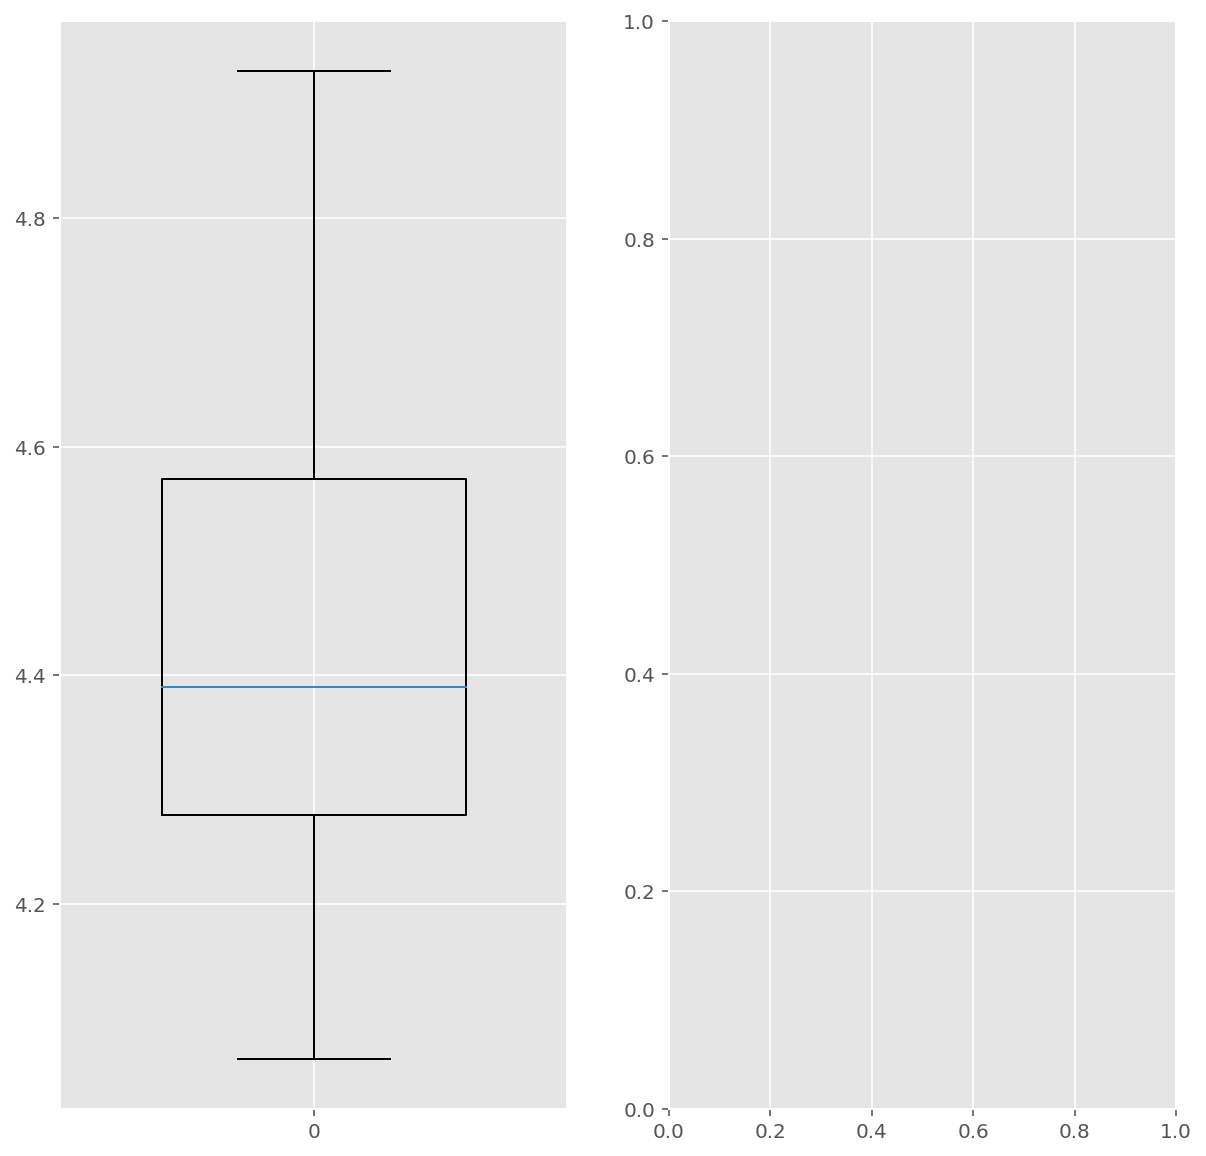

In [60]:
value_cols = ['log']
titles = value_cols
df = df1.copy()
# boxplot overlaps individual data point
# m = len(value_cols)
# rw = int(len(value_cols)/2.0

fig, axes = plt.subplots(round(len(value_cols)/2.0)+1, 2, figsize=(10, 10))
axes = axes.ravel()
# group_col = 'combo'
group_col = 'reanne_HIV_status'
tissue_col = 'low_cd4_counts'
# tissue_col = 'hiv_load'
# tissue_col = 'cd4_count'
# tissue_col = 'reanne_Putative_histology'

# df = df[value_cols + [group_col] + [tissue_col]].dropna()
# df['log10_T_cells'] = np.log10(df['T cells'])
 
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
tissues = sorted(df[tissue_col].unique().tolist(), reverse=True)
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes[k]
    value_col = col
    for position, cat in enumerate(categories):
        print(group_col, cat, col)
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False)
                  

#     np.random.seed(0)
#     grps = {}
#     # overlay actuall data point based on tissue types
#     for i, cat in enumerate(categories):
#         # add jitter and specify maker facecolor and edgecolor               
#         for j, tissue in enumerate(tissues):
#             y = (df.query('{0}=="{1}" & {2}=="{3}"'.format(group_col, cat, tissue_col, tissue))[value_col])
         
#             x = np.random.normal(i, 0.1, size=len(y))
#     #         ax.scatter(x, y, s=30)
# #             lb = '' if i == 0 else tissue
#             lb = '' if i == 0 else '{0}:{1}'.format('cd4', tissue)
#             _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
#                            mec='k', ms=7, marker="o", linestyle="None", label=lb)
#             grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]
# #         show the unequal variance of each group, not equal
#         print('{0} {1} is {2}'.format(k, i, np.var(grps[i])))
#     # statistical test for 1st grp, normally distributed, t test is used
#     stats, p_U = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
#     p_U = round(p_U, 4)
#     _ = ax.text(0.1, 0.85,'p={}'.format(p_U), ha='center', va='center', transform=ax.transAxes, size=10) 
#     _ = ax.text(0.1, 0.80,'n={}'.format(100), ha='center', va='center', transform=ax.transAxes, size=10) 

# #     statsT, p_T = ss.ttest_ind(grps[0], grps[1])
# #     p_T = round(p_T, 4)
# #     print(col, p_T)
# #     _ = ax.text(0.5, 0.90,'p={}'.format(p_T), ha='center', va='center', transform=ax.transAxes, size=14)     

#     _ = ax.set_facecolor('whitesmoke') #specify plot backgroup color
#     _ = ax.tick_params(axis='x', labelsize=14) #specify x tick label size
#     _ = ax.set_xticks(range(position+1))
#     _ = ax.set_xticklabels(categories, rotation=0, fontsize=14)
# #     ax.set_title(col)
#     _ = ax.set_title('{}'.format(titles[k]), fontsize=14)
#     _ = ax.set_xlim(xmin=-0.5)
#     _= ax.set_ylabel(col, fontsize=14)
#     ax.grid(True)
#     _ = ax.legend(scatterpoints=1,
#               loc='upper right',
#               ncol=1,
#               fontsize=12)
# plt.suptitle('', fontsize=14)
# of = '/projects/trans_scratch/validations/workspace/szong/Cervical/mcp_cells.png'
# # plt.savefig(of, dpi=200)